## Data Analysis
- Study the correlation of traits, select traits to build model
- Data Visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import treated data, pay attention to the version control
df = pd.read_csv("JointData.csv")  # "JointData.csv" is given to the lastest dataset(the one to use)

In [3]:
df.head()

,date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,...,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-07-27,0,0,0,0,0,0,0,0,0,...,84.0,4172.0,152405,313.0,9446,154.0,6998.0,1.0,68.0,3963.0
1,2020-07-28,0,0,0,0,0,0,0,0,0,...,86.0,3074.0,155479,171.0,9617,47.0,7045.0,0.0,68.0,2221.0
2,2020-07-29,1,1,0,0,1,1,0,0,0,...,86.0,2449.0,157928,173.0,9790,116.0,7161.0,0.0,68.0,1903.0
3,2020-07-30,0,1,0,0,0,1,0,0,0,...,87.0,2768.0,160696,170.0,9960,143.0,7304.0,1.0,69.0,3886.0
4,2020-07-31,1,2,1,1,0,1,0,0,0,...,89.0,2788.0,163484,187.0,10147,217.0,7521.0,2.0,71.0,3249.0


In [4]:
# find and treat non-numerical traits
notNum = []
for trait in df.columns:
    if df[trait].dtypes != "int64":
        try:
            df[trait] = pd.to_numeric(df[trait])
        except Exception:
            notNum.append(trait)
print(notNum)

['date', 'area']


In [5]:
corr = df.corr()  # col number should be (38 - len(notNum))
corr

,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,...,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
total_doses,1.000000,0.185494,0.955165,0.163143,0.959752,0.224683,0.537262,0.135762,0.575339,0.087022,...,0.466543,0.263752,0.275153,0.002725,0.323845,-0.065797,0.341771,0.198639,0.423258,0.006891
cumulative_total_doses,0.185494,1.000000,0.230117,0.998848,0.065060,0.997236,0.072649,0.992630,0.709599,0.947752,...,0.903320,0.137333,0.968433,0.146475,0.892948,0.092123,0.893732,-0.144870,0.942715,0.435802
pfizer_doses,0.955165,0.230117,1.000000,0.205822,0.848051,0.273732,0.464588,0.193188,0.537055,0.098449,...,0.499391,0.251655,0.298689,-0.005233,0.343890,-0.069666,0.363031,0.145076,0.460752,-0.012348
cumulative_pfizer_doses,0.163143,0.998848,0.205822,1.000000,0.045868,0.993005,0.054663,0.992201,0.706646,0.951900,...,0.895886,0.146115,0.968748,0.152199,0.888845,0.096638,0.889337,-0.141201,0.934635,0.446322
moderna_doses,0.959752,0.065060,0.848051,0.045868,1.000000,0.099357,0.468822,0.006897,0.494177,-0.004225,...,0.360364,0.233215,0.171731,-0.024111,0.231731,-0.066389,0.249185,0.274926,0.308280,-0.009025
cumulative_moderna_doses,0.224683,0.997236,0.273732,0.993005,0.099357,1.000000,0.103288,0.990135,0.705945,0.927308,...,0.915627,0.116994,0.961549,0.121778,0.888196,0.073090,0.890832,-0.152195,0.955854,0.409111
jj_doses,0.537262,0.072649,0.464588,0.054663,0.468822,0.103288,1.000000,0.056255,0.218534,-0.003402,...,0.209674,0.009572,0.092640,-0.107027,0.113091,-0.100922,0.124399,-0.040398,0.216796,-0.079630
cumulative_jj_doses,0.135762,0.992630,0.193188,0.992201,0.006897,0.990135,0.056255,1.000000,0.670327,0.925510,...,0.867899,0.113990,0.940027,0.125287,0.845368,0.075308,0.846544,-0.199241,0.917071,0.410008
partially_vaccinated,0.575339,0.709599,0.537055,0.706646,0.494177,0.705945,0.218534,0.670327,1.000000,0.726206,...,0.712997,0.454018,0.753853,0.330269,0.723131,0.119257,0.719804,0.022770,0.715191,0.303135
total_partially_vaccinated,0.087022,0.947752,0.098449,0.951900,-0.004225,0.927308,-0.003402,0.925510,0.726206,1.000000,...,0.810217,0.218758,0.950061,0.274146,0.906684,0.191153,0.896000,-0.081843,0.841812,0.529764


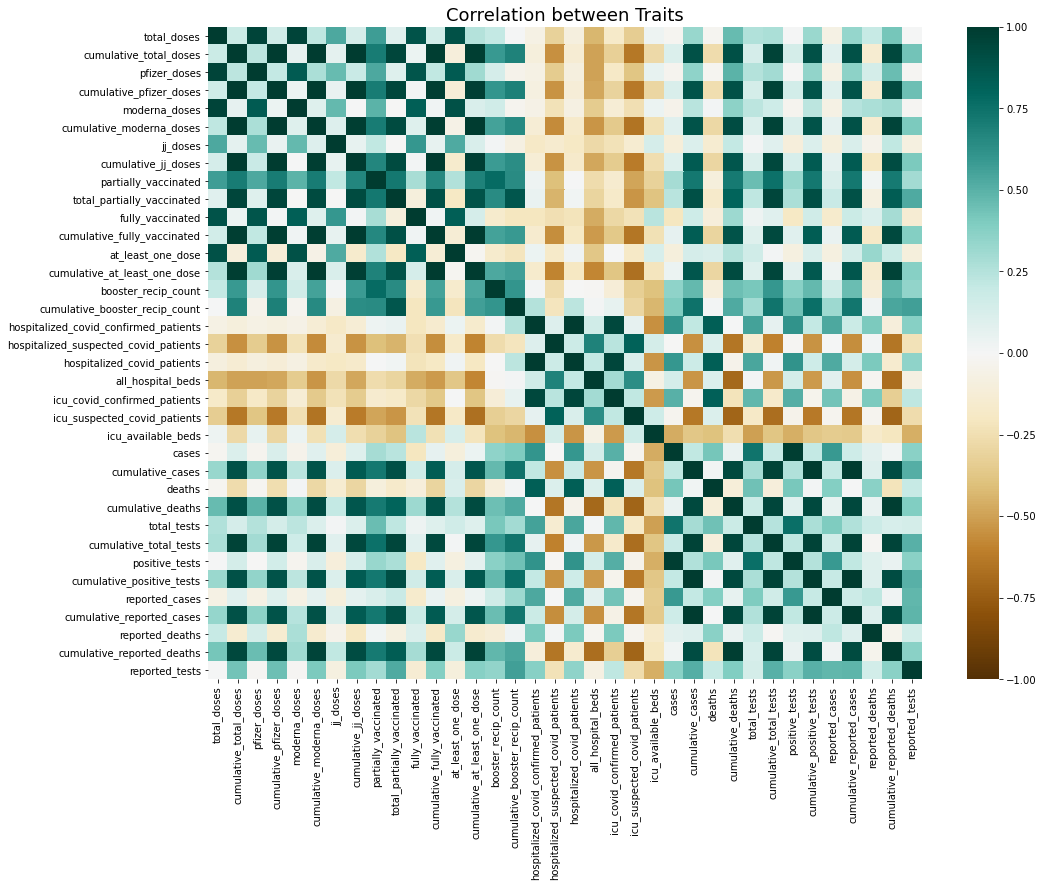

In [6]:
plt.figure(figsize = (16,12))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = "BrBG")
heatmap.set_title("Correlation between Traits", fontdict = {"fontsize":18})
plt.show()

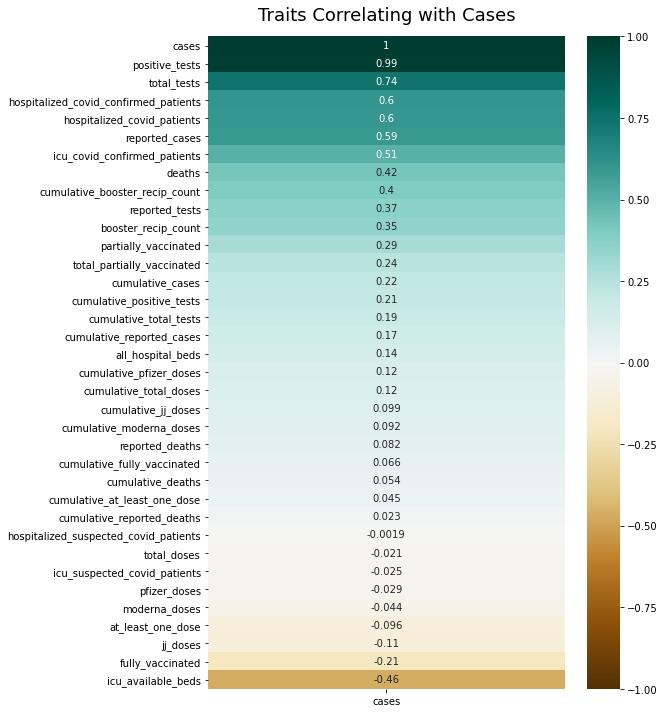

In [7]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[["cases"]].sort_values(by = "cases", ascending = False),\
                      vmin = -1, vmax = 1, annot = True, cmap = "BrBG")
heatmap.set_title("Traits Correlating with Cases", fontdict = {"fontsize":18}, pad = 16)
plt.show()

In [8]:
# pick traits linearly correlated with cases
rela = []
for trait in corr.columns:  # square matrix
    if (abs(corr["cases"][trait]) >= 0.5) and (trait != "cases"):
        rela.append(trait)
print(rela)

['hospitalized_covid_confirmed_patients', 'hospitalized_covid_patients', 'icu_covid_confirmed_patients', 'total_tests', 'positive_tests', 'reported_cases']


In [9]:
# Notice that Correlation is not good when the existing relationship is non-linear
# Check traits by plotting the trends

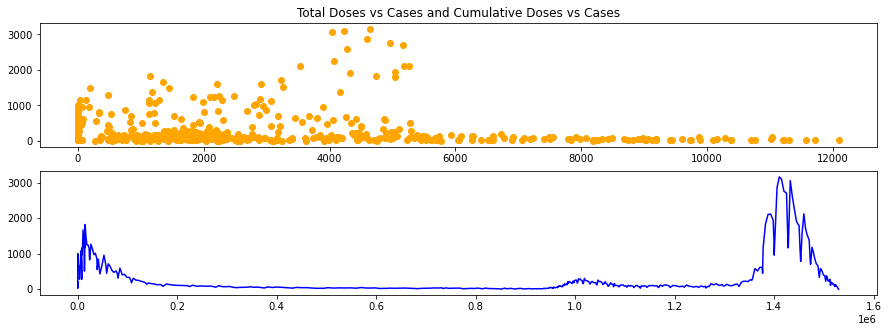

In [10]:
plt.figure(1, figsize = (15,5))
plt.subplot(211)
plt.scatter(df["total_doses"],df["cases"], color = "orange")
plt.title("Total Doses vs Cases and Cumulative Doses vs Cases")
plt.subplot(212)
plt.plot(df["cumulative_total_doses"],df["cases"], color = "blue")
plt.show()

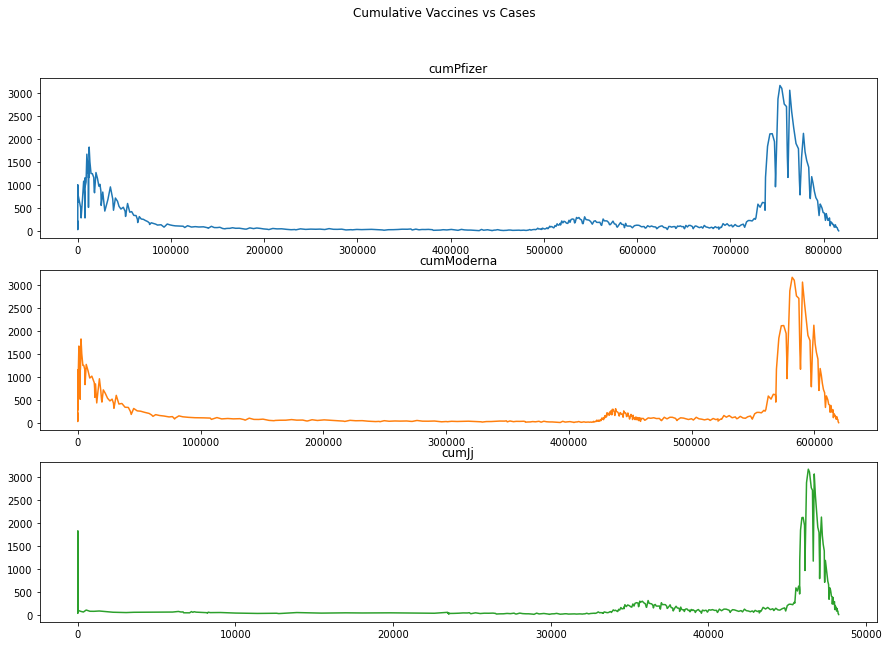

In [11]:
fig, (cumPfizer, cumModerna, cumJj) = plt.subplots(3)
fig.set_size_inches(15,10)
fig.suptitle("Cumulative Vaccines vs Cases")
cumPfizer.plot(df["cumulative_pfizer_doses"],df["cases"], "tab:blue")
cumPfizer.set_title("cumPfizer")
cumModerna.plot(df["cumulative_moderna_doses"],df["cases"], "tab:orange")
cumModerna.set_title("cumModerna")
cumJj.plot(df["cumulative_jj_doses"],df["cases"], "tab:green")
cumJj.set_title("cumJj")
plt.figure(1, figsize = (15,5))
plt.show()

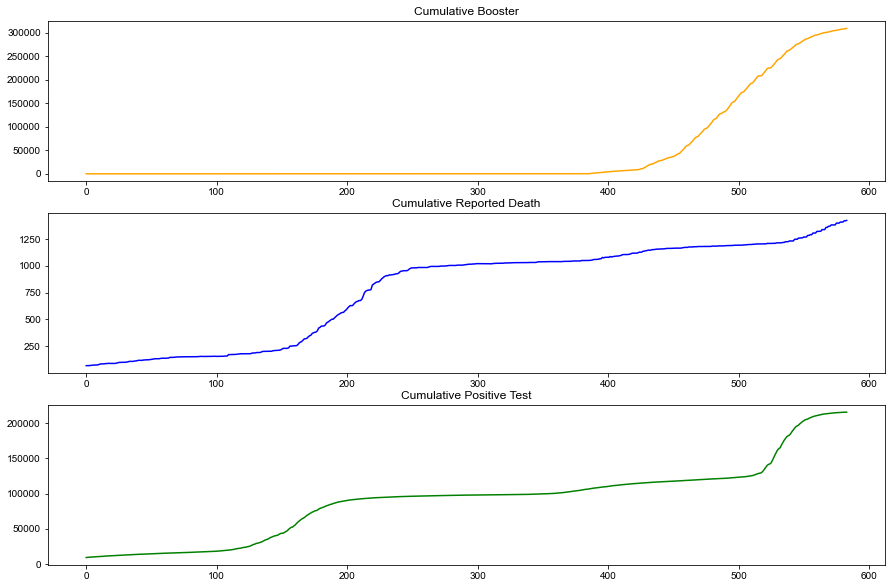

In [12]:
fig, (cumBooster, cumRepDeath, cumPosiTest) = plt.subplots(3)
fig.set_size_inches(15,10)
sns.set_theme(style="darkgrid")

t = np.linspace(0,len(df["date"]),len(df["date"]))
cumBooster.plot(t,df["cumulative_booster_recip_count"], color = "orange")
cumBooster.set_title("Cumulative Booster")
cumRepDeath.plot(t,df["cumulative_reported_deaths"], color = "blue")
cumRepDeath.set_title("Cumulative Reported Death")
cumPosiTest.plot(t,df["cumulative_positive_tests"], color = "green")
cumPosiTest.set_title("Cumulative Positive Test")
plt.show()

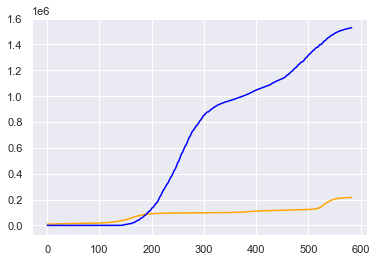

In [13]:
fig.set_size_inches(15,10)
sns.set_theme(style="darkgrid")

t = np.linspace(0,len(df["date"]),len(df["date"]))
plt.plot(t, df["cumulative_positive_tests"],color = "orange")
plt.plot(t, df["cumulative_total_doses"],color = "blue")
plt.show()

In [14]:
df.columns

Index(['date', 'total_doses', 'cumulative_total_doses', 'pfizer_doses',
       'cumulative_pfizer_doses', 'moderna_doses', 'cumulative_moderna_doses',
       'jj_doses', 'cumulative_jj_doses', 'partially_vaccinated',
       'total_partially_vaccinated', 'fully_vaccinated',
       'cumulative_fully_vaccinated', 'at_least_one_dose',
       'cumulative_at_least_one_dose', 'booster_recip_count',
       'cumulative_booster_recip_count',
       'hospitalized_covid_confirmed_patients',
       'hospitalized_suspected_covid_patients', 'hospitalized_covid_patients',
       'all_hospital_beds', 'icu_covid_confirmed_patients',
       'icu_suspected_covid_patients', 'icu_available_beds', 'area', 'cases',
       'cumulative_cases', 'deaths', 'cumulative_deaths', 'total_tests',
       'cumulative_total_tests', 'positive_tests', 'cumulative_positive_tests',
       'reported_cases', 'cumulative_reported_cases', 'reported_deaths',
       'cumulative_reported_deaths', 'reported_tests'],
      dtype='obje

## Case in Hong Kong
$\href{https://ourworldindata.org/coronavirus/country/hong-kong}{\text{A resource I find}}$

late update: 3/9/2022

In [15]:
Hk = pd.read_csv("owid-covid-data.csv")
Hk = Hk[Hk["location"] == "Hong Kong"]
# export directly so we have smaller dataset to look at
Hk.to_csv("Hk.csv")  # remember to control version locally

In [16]:
# drop traits:
Hk.reset_index(drop = True, inplace = True)
Hk.drop(["iso_code","continent","location"], inplace = True, axis = 1)
# drop column if half of data is nan
for trait in Hk.columns:
    if Hk[trait].isnull().values.sum() >= len(Hk)/3:
        Hk.drop(trait, inplace = True, axis = 1)
print(Hk.shape)
Hk

(777, 26)


,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,diabetes_prevalence,life_expectancy,human_development_index
0,2020-01-23,2.0,2.0,NaN,NaN,NaN,NaN,0.265,0.265,NaN,...,13.89,7552800.0,7039.714,44.8,16.303,10.158,56054.92,8.33,84.86,0.949
1,2020-01-24,2.0,0.0,NaN,NaN,NaN,NaN,0.265,0.000,NaN,...,13.89,7552800.0,7039.714,44.8,16.303,10.158,56054.92,8.33,84.86,0.949
2,2020-01-25,5.0,3.0,NaN,NaN,NaN,NaN,0.662,0.397,NaN,...,25.00,7552800.0,7039.714,44.8,16.303,10.158,56054.92,8.33,84.86,0.949
3,2020-01-26,8.0,3.0,NaN,NaN,NaN,NaN,1.059,0.397,NaN,...,36.11,7552800.0,7039.714,44.8,16.303,10.158,56054.92,8.33,84.86,0.949
4,2020-01-27,8.0,0.0,NaN,NaN,NaN,NaN,1.059,0.000,NaN,...,41.67,7552800.0,7039.714,44.8,16.303,10.158,56054.92,8.33,84.86,0.949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2022-03-05,440609.0,37529.0,43093.429,1774.0,220.0,171.000,58337.173,4968.886,5705.623,...,NaN,7552800.0,7039.714,44.8,16.303,10.158,56054.92,8.33,84.86,0.949
773,2022-03-06,471617.0,31008.0,42900.429,2007.0,233.0,192.571,62442.670,4105.497,5680.069,...,NaN,7552800.0,7039.714,44.8,16.303,10.158,56054.92,8.33,84.86,0.949
774,2022-03-07,496767.0,25150.0,41569.571,2287.0,280.0,220.429,65772.561,3329.891,5503.862,...,NaN,7552800.0,7039.714,44.8,16.303,10.158,56054.92,8.33,84.86,0.949
775,2022-03-08,525242.0,28475.0,40980.714,2578.0,291.0,226.857,69542.686,3770.125,5425.897,...,NaN,7552800.0,7039.714,44.8,16.303,10.158,56054.92,8.33,84.86,0.949


In [17]:
Hk.columns  # many constant values that we are not interested in: population, pop_dense, med_age, etc

Index(['date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'diabetes_prevalence', 'life_expectancy', 'human_development_index'],
      dtype='object')

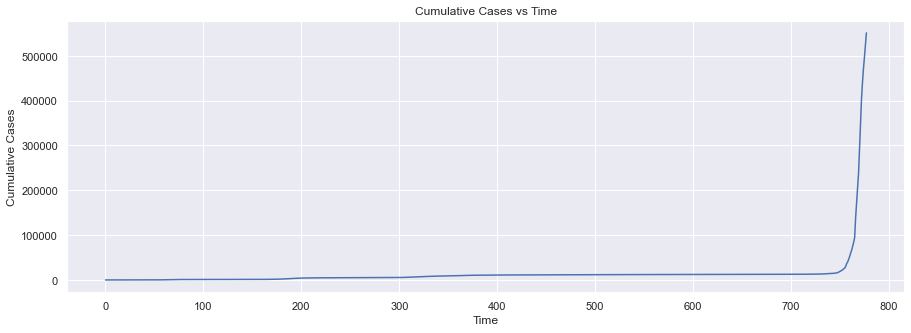

In [18]:
sns.set_theme(style="darkgrid")
plt.figure(1,figsize = (15,5))
plt.xlabel("Time")
plt.ylabel("Cumulative Cases")
plt.title("Cumulative Cases vs Time")

t = np.linspace(0,len(Hk["date"]),len(Hk["date"]))
sns.lineplot(x=t, y="total_cases", data=Hk)

plt.show()